## Define the Hamiltonian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 500

def haldane_honeycomb(t1, t2, m, phi, kx, ky):

    k = np.array([kx, ky])

    a1 = np.array([np.sqrt(3) * 0.5, 0.5])
    a2 = np.array([0, -1])
    a3 = np.array([-np.sqrt(3) * 0.5, 0.5])

    b1 = a2 - a3
    b2 = a3 - a1
    b3 = a1 - a2

    sigma0 = np.eye(2)
    sigmax = np.array([[0, 1], [1, 0]])
    sigmay = np.array([[0, -1j], [1j, 0]])
    sigmaz = np.array([[1, 0], [0, -1]])

    d0 = 2*t2*np.cos(phi)*(np.cos(k.dot(b1))+np.cos(k.dot(b2))+np.cos(k.dot(b3)))
    dx = t1*(np.cos(k.dot(a1))+np.cos(k.dot(a2))+np.cos(k.dot(a3)))
    dy = t1*(-np.sin(k.dot(a1))-np.sin(k.dot(a2))-np.sin(k.dot(a3)))
    dz = m+2*t2*np.sin(phi)*(np.sin(k.dot(b1))+np.sin(k.dot(b2))+np.sin(k.dot(b3)))

    hk = d0*sigma0+dx*sigmax+dy*sigmay+dz*sigmaz

    return hk

In [2]:
K1 = 4*np.pi/3*np.array([1/np.sqrt(3),0], dtype=float)
K2 = 2*np.pi/3*np.array([1/np.sqrt(3),1], dtype=float)
K3 = 4*np.pi/3*np.array([1/np.sqrt(3),1], dtype=float)

kx_max=2*np.pi/(np.sqrt(3))
ky_max=4*np.pi/3

def plot_FBZ():
    plt.plot([0,0], [0,4*np.pi/3], '--k',linewidth=0.5)
    plt.plot([2*np.pi/(np.sqrt(3)),2*np.pi/(np.sqrt(3))], [0,4*np.pi/3], '--k',linewidth=0.5)
    plt.plot([0,2*np.pi/(np.sqrt(3))], [0,0], '--k',linewidth=0.5)
    plt.plot([0,2*np.pi/(np.sqrt(3))], [4*np.pi/3,4*np.pi/3], '--k',linewidth=0.5,label="FBZ")
    plt.plot(K1[0], K1[1], "*b")
    plt.plot(K2[0], K2[1], "*r", label="$K'$")
    plt.plot(K3[0], K3[1], "*b", label="$K$")
    plt.legend()

## Plot the dispersion relation

In [3]:
def get_eigen(t1, t2, m, phi, kx, ky):
    hk = haldane_honeycomb(t1, t2, m, phi, kx, ky)
    E,states=np.linalg.eigh(hk)
    return E[0],E[1],states

In [4]:
def band_plot(band_id,m,phi,t2,A,B):  
    t1=1

    xmom=np.linspace(A[0],A[1],150)
    ymom=np.linspace(B[0],B[1],150)

    En_lower=[]
    En_upper=[]
    
    for kx in xmom:
        for ky in ymom:
            E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    if band_id=="l":
        plt.contourf(xmom, ymom, Energy_lower, 1000, cmap='RdBu')
        plt.colorbar(label="$E_l$",ticks=list(np.linspace(np.min(Energy_lower),np.max(Energy_lower),10)))
    elif band_id=="u":
        plt.contourf(xmom, ymom, Energy_upper, 1000, cmap='RdBu')
        plt.colorbar(label="$E_u$",ticks=list(np.linspace(np.min(Energy_upper),np.max(Energy_upper),10)))
    elif band_id=="d":
        plt.contourf(xmom, ymom, Energy_upper-Energy_lower, 1000, cmap='RdBu')
        plt.colorbar(label="$E_d-E_l$",ticks=list(np.linspace(np.min(Energy_upper-Energy_lower),np.max(Energy_upper-Energy_lower),10)))
    plot_FBZ()
    plt.axis("scaled")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title("$m$="+str(round(m,2))+", $\phi$="+str(round(phi,2))+", $t_2$="+str(round(t2,2)))
    plt.show()

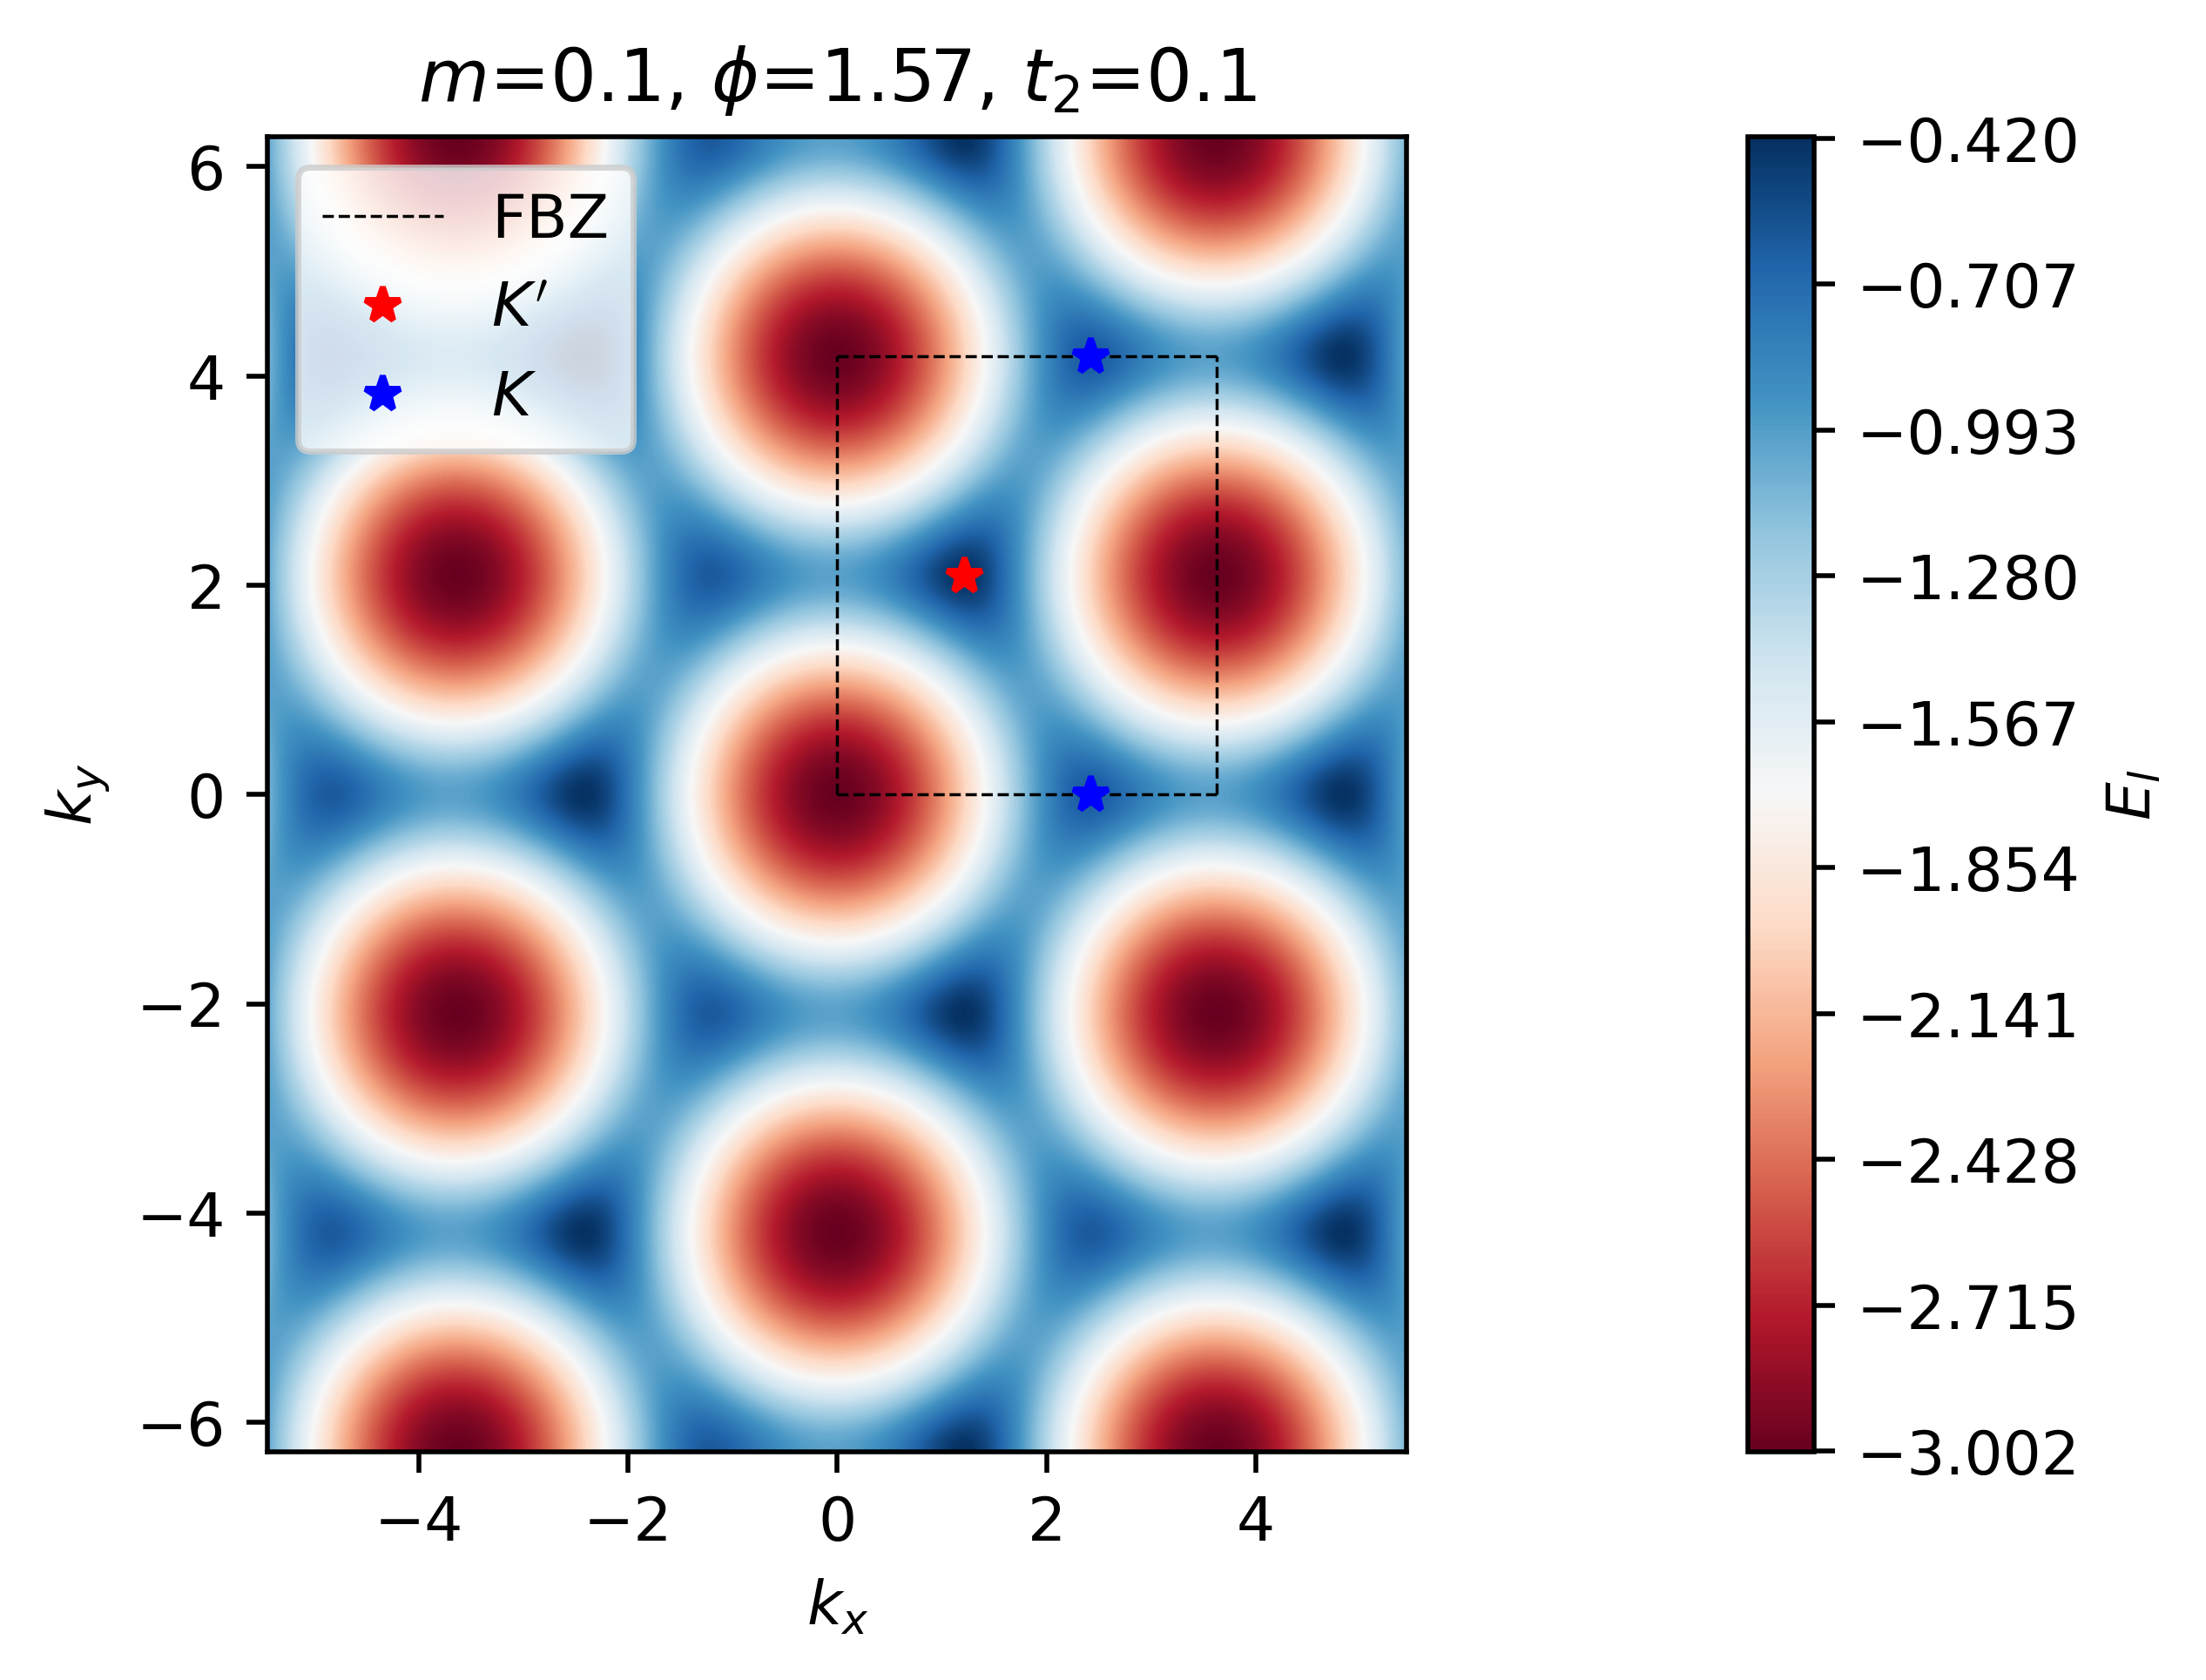

In [5]:
# Contour of dispersion in the (transformed) FBZ
band_plot("l",0.1,np.pi/2,0.1,[-1.5*kx_max,1.5*kx_max],[-1.5*ky_max,1.5*ky_max]) 

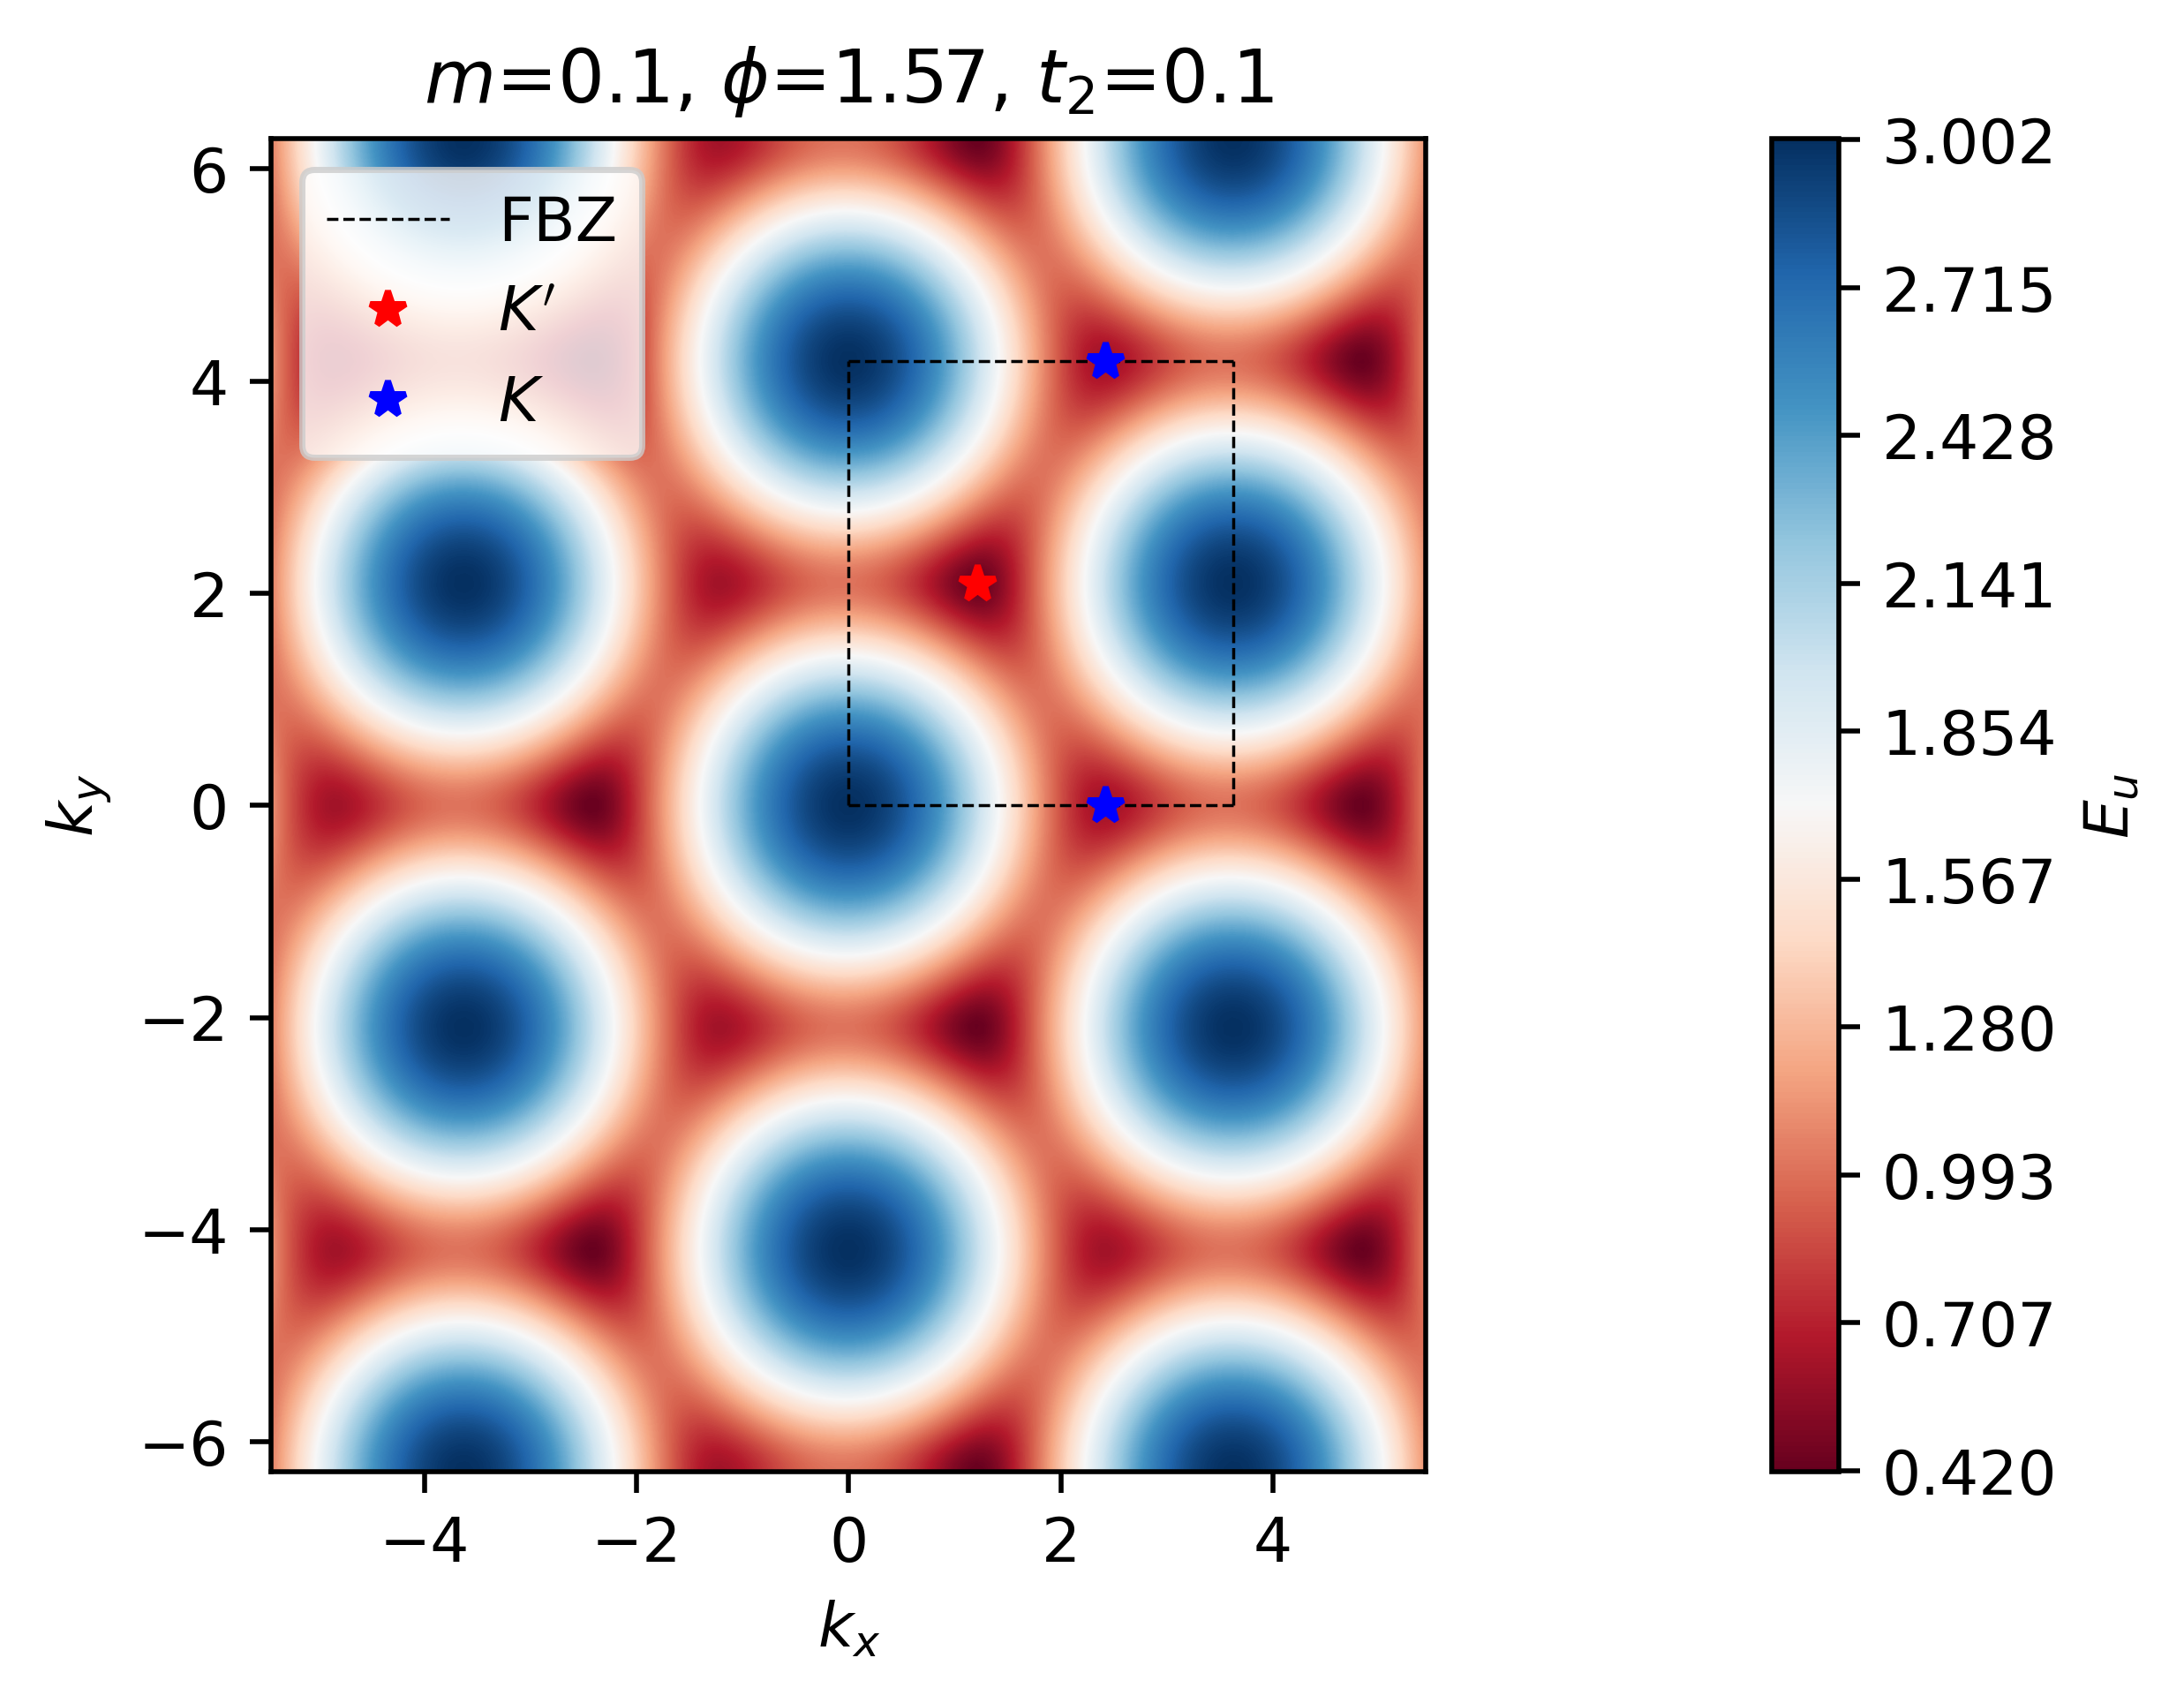

In [6]:
# Contour of dispersion in the (transformed) FBZ
band_plot("u",0.1,np.pi/2,0.1,[-1.5*kx_max,1.5*kx_max],[-1.5*ky_max,1.5*ky_max]) 

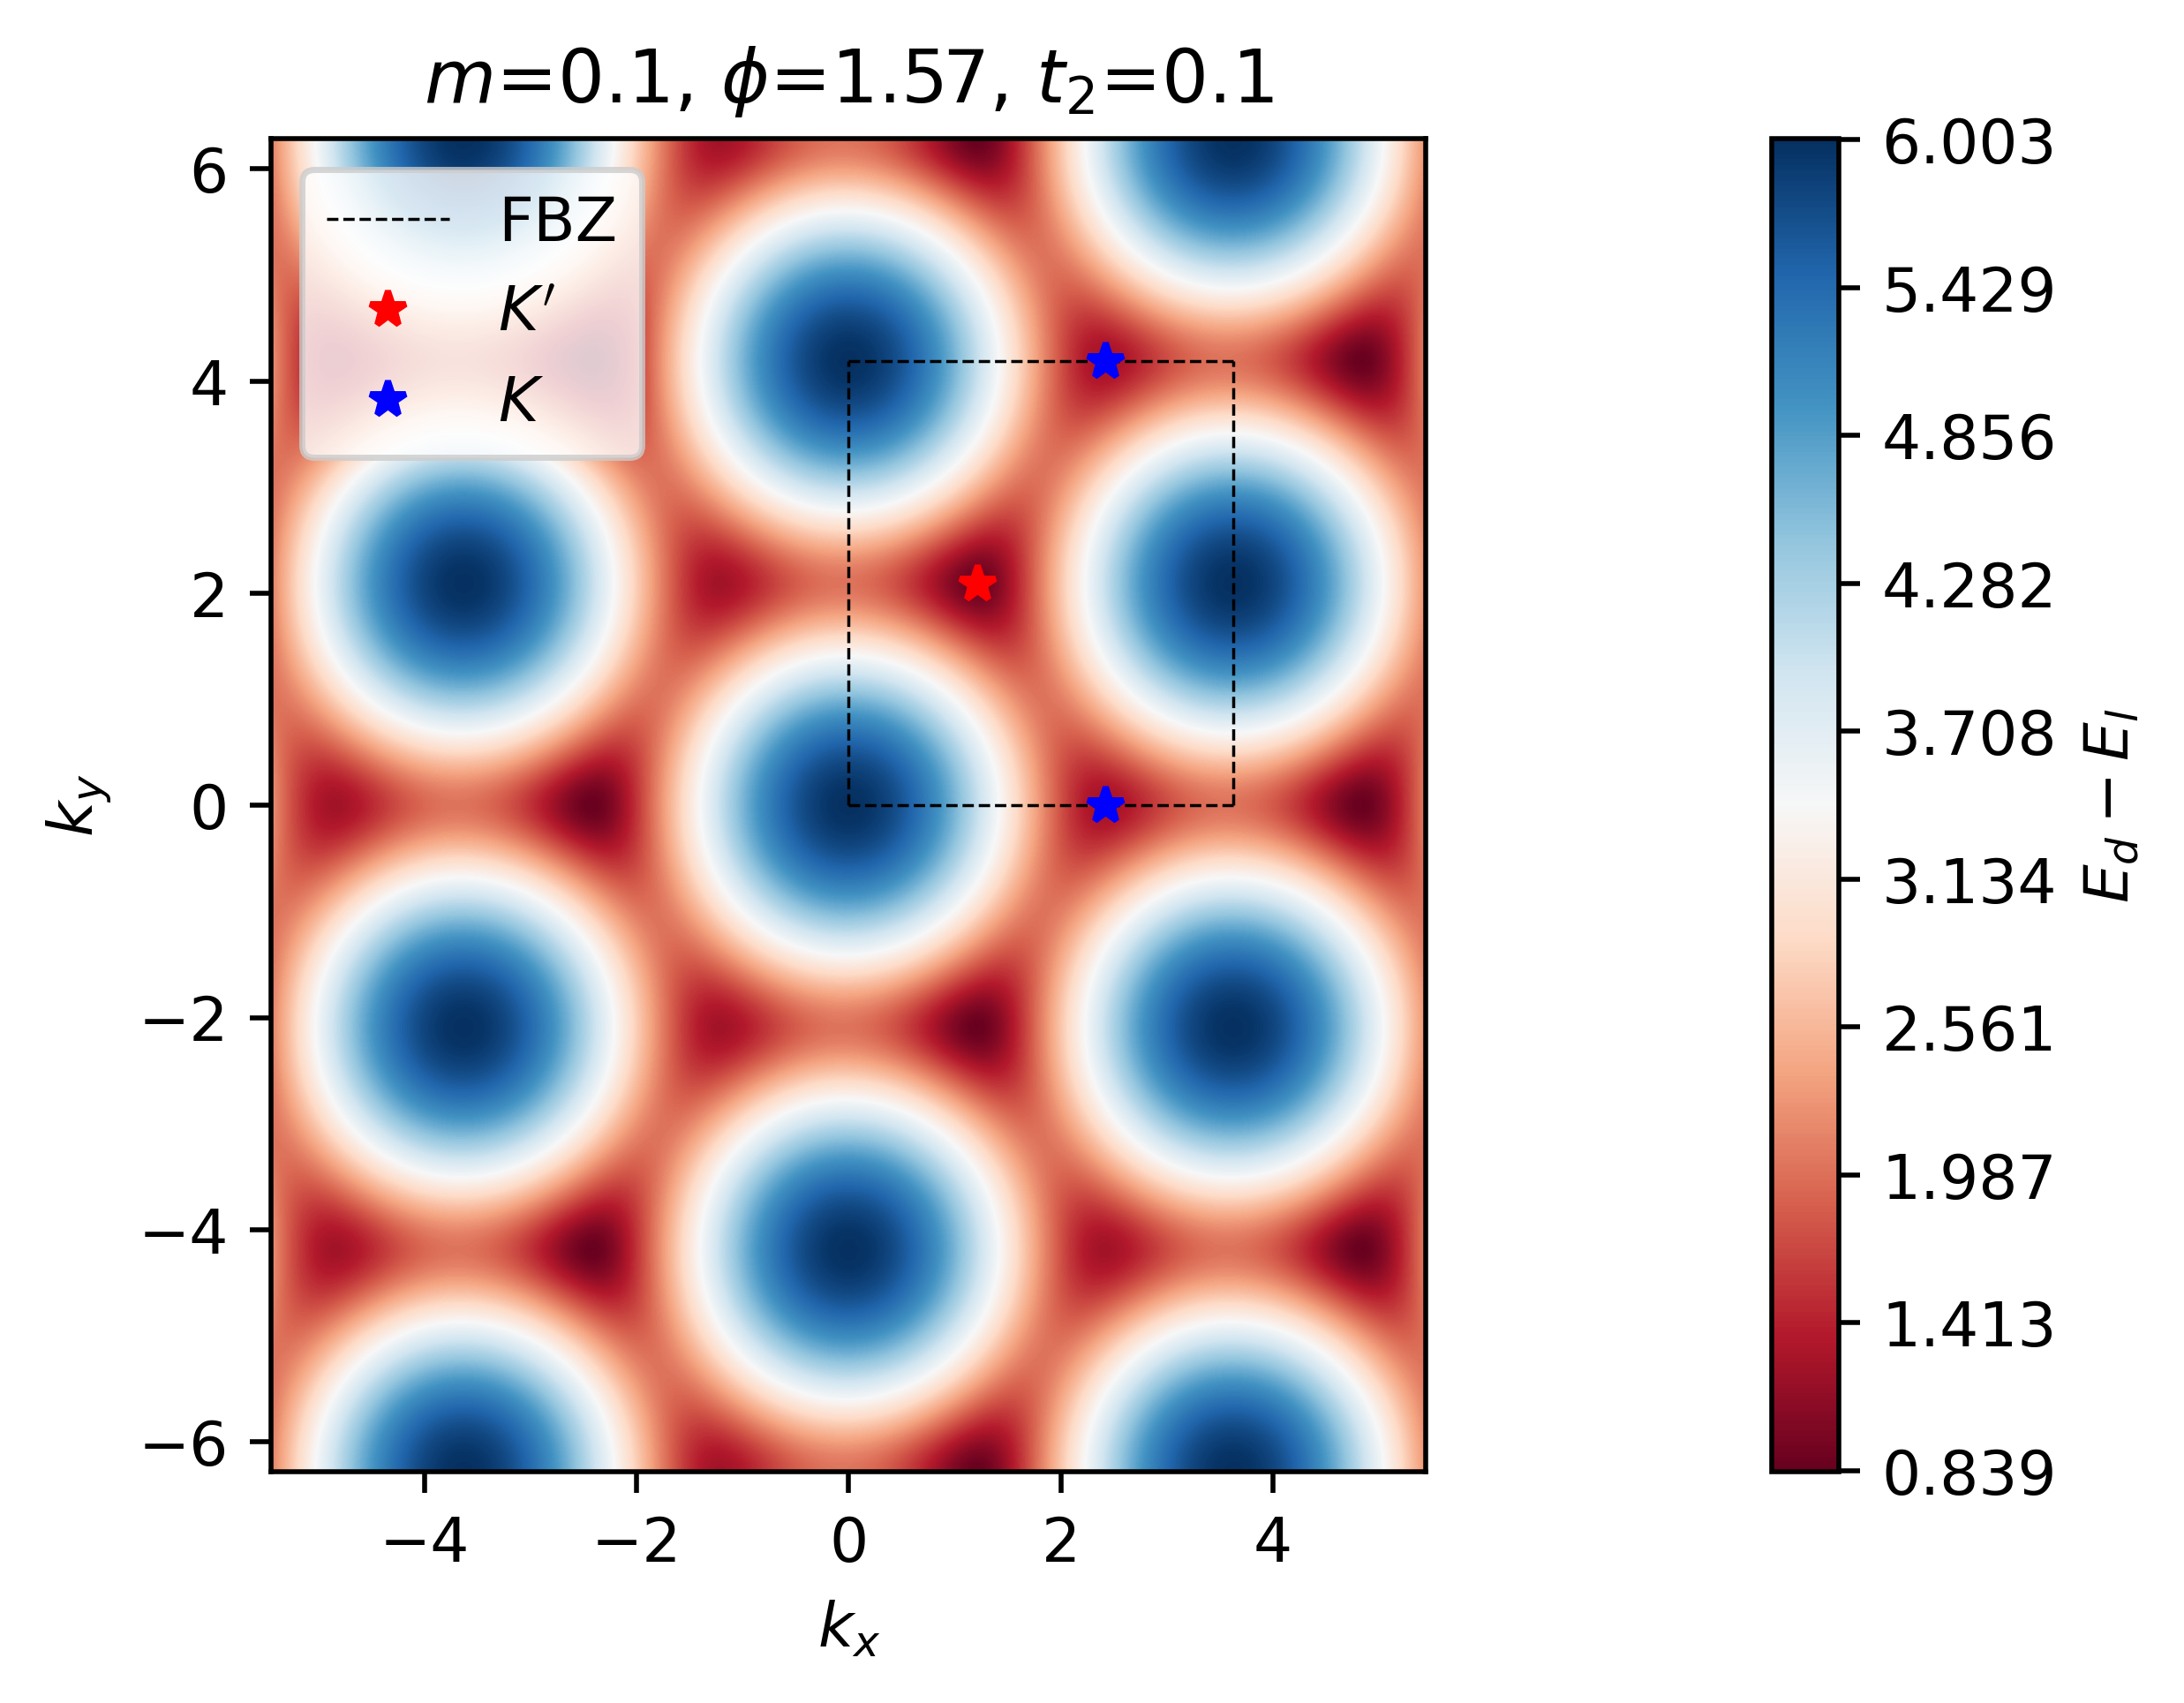

In [7]:
# Contour of dispersion in the (transformed) FBZ
band_plot("d",0.1,np.pi/2,0.1,[-1.5*kx_max,1.5*kx_max],[-1.5*ky_max,1.5*ky_max]) 

## Calculate the lattice field

In [8]:
def Lat_Field(m,phi,t2,mom,delta_mom):
    t1=1
    
    mom=mom
    momx=np.array([mom[0]+delta_mom[0],mom[1]])
    momy=np.array([mom[0],mom[1]+delta_mom[1]])
    momxy=np.array([mom[0]+delta_mom[0],mom[1]+delta_mom[1]])
    
    El,Eu,psi=get_eigen(t1, t2, m, phi, mom[0], mom[1])
    Elx,Eux,psix=get_eigen(t1, t2, m, phi, momx[0], momx[1])
    Ely,Eux,psiy=get_eigen(t1, t2, m, phi, momy[0], momy[1])
    Elxy,Euxy,psixy=get_eigen(t1, t2, m, phi, momxy[0], momxy[1])
    
    U1x=(np.conj(psi[:,0]).dot(psix[:,0]))/(np.absolute(np.conj(psi[:,0]).dot(psix[:,0])))
    U1y=(np.conj(psi[:,0]).dot(psiy[:,0]))/(np.absolute(np.conj(psi[:,0]).dot(psiy[:,0])))
    U2x=(np.conj(psix[:,0]).dot(psixy[:,0]))/(np.absolute(np.conj(psix[:,0]).dot(psixy[:,0])))
    U2y=(np.conj(psiy[:,0]).dot(psixy[:,0]))/(np.absolute(np.conj(psiy[:,0]).dot(psixy[:,0])))

    LField=np.log(U1x*U2x/(U2y*U1y))

    return LField

## Calculating the Berry connection, curvature and Chern number

In [9]:
import sympy as sy 
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np

kx=sy.symbols("k_x")
ky=sy.symbols("k_y")
    
def sy_haldane_honeycomb(t1,t2,m,phi):
    k = sy.Matrix([kx, ky])

    a1 = sy.Matrix([sy.sqrt(3) * 0.5, 0.5])
    a2 = sy.Matrix([0, -1])
    a3 = sy.Matrix([-sy.sqrt(3) * 0.5, 0.5])

    b1 = a2 - a3
    b2 = a3 - a1
    b3 = a1 - a2

    sigma0 = sy.Matrix([[1,0],[0,1]])
    sigmax = sy.Matrix([[0, 1], [1, 0]])
    sigmay = sy.Matrix([[0, -1j], [1j, 0]])
    sigmaz = sy.Matrix([[1, 0], [0, -1]])
    
    d0 = 2 * t2 * sy.cos(phi) * (sy.cos(k.dot(b1)) + sy.cos(k.dot(b2)) + sy.cos(k.dot(b3)))
    dx = t1*((sy.cos(k.dot(a1)) + sy.cos(k.dot(a2)) + sy.cos(k.dot(a3))))
    dy = t1*(-sy.sin(k.dot(a1)) - sy.sin(k.dot(a2)) - sy.sin(k.dot(a3)))
    dz = m + 2 * t2 * sy.sin(phi) * (sy.sin(k.dot(b1)) + sy.sin(k.dot(b2)) + sy.sin(k.dot(b3)))
        
    hk = d0 * sigma0 + dx * sigmax + dy * sigmay + dz * sigmaz

    return d0,dx,dy,dz,hk

In [10]:
def sy_Haldane_eigen(t1,t2,m,phi):
    d0,dx,dy,dz,ham=sy_haldane_honeycomb(t1,t2,m,phi)
    
    d=sy.sqrt(dx**2+dy**2+dz**2)
    
    Ed=d0-d
    Eu=d0+d
    Nd=sy.sqrt(2*d*(d-dz))
    Nu=sy.sqrt(2*d*(d+dz))
    Psid=1/Nd*sy.Matrix([[dz-d],[dx+1j*dy]])
    Psiu=1/Nu*sy.Matrix([[dz+d],[dx-1j*dy]])
    
    return Ed,Eu,Psid,Psiu

In [11]:
def sy_Berry_conn(Psi):
    xdiffPsi=sy.diff(Psi,kx)
    Bx_conn=sy.conjugate(Psi).dot(xdiffPsi)
    ydiffPsi=sy.diff(Psi,ky)
    By_conn=sy.conjugate(Psi).dot(ydiffPsi)
    return Bx_conn,By_conn

In [12]:
def berry_conn_plot(component,m,phi,t2,A,B):  
    t1=1
    
    Ed,Eu,Psid,Psiu=sy_Haldane_eigen(t1,t2,m,phi)
    
    Bxconn,Byconn=sy_Berry_conn(Psid)
    
    Bxconn=sy.lambdify([kx, ky], Bxconn, modules=['numpy'])
    Byconn=sy.lambdify([kx, ky], Byconn, modules=['numpy'])

    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)
    
    delta_mom=np.array([(max(xmom)-min(xmom))/100,(max(ymom)-min(ymom))/100])
    
    Berry_connx=[]
    Berry_conny=[]
    
    for kx1 in xmom:
        for ky1 in ymom:
            mom=np.array([kx1,ky1])
            Ax = Bxconn(kx1,ky1)
            Ay = Byconn(kx1,ky1)
            Berry_connx.extend([np.abs(Ax)])
            Berry_conny.extend([np.abs(Ay)])
    
    Berry_connectionx=np.transpose(np.reshape(Berry_connx,(len(xmom),len(ymom))))
    Berry_connectiony=np.transpose(np.reshape(Berry_conny,(len(xmom),len(ymom))))
    
    Berry_connectionx[Berry_connectionx<=1e-7]=1e-7
    Berry_connectiony[Berry_connectiony<=1e-7]=1e-7
    if component=="x":
        plt.contourf(xmom, ymom, np.log10(Berry_connectionx), 1000, cmap='plasma')
        plt.colorbar(label="$\log(A_{x})$")
        #Berry_connectionx[Berry_connectionx>=2]=0
        #Berry_connectiony[Berry_connectiony>=2]=0
        #plt.quiver(xmom, ymom,(Berry_connectionx),(Berry_connectiony))
    elif component=="y":
        plt.contourf(xmom, ymom, np.log10(Berry_connectiony), 1000, cmap='plasma')
        plt.colorbar(label="$\log(A_{x})$")
        #Berry_connectionx[Berry_connectionx>=2]=0
        #Berry_connectiony[Berry_connectiony>=2]=0
        #plt.quiver(xmom, ymom,(Berry_connectionx),(Berry_connectiony))
    else:
        print("Please enter a suitable component ($x$ or $y$) for the Berry connection")
    plot_FBZ()
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.axis("scaled")
    plt.title("$m$="+str(round(m,2))+", $\phi$="+str(round(phi,2))+", $t_2$="+str(round(t2,2)))
    plt.legend()
    plt.show()
    plt.savefig("Berry_connection.pdf")

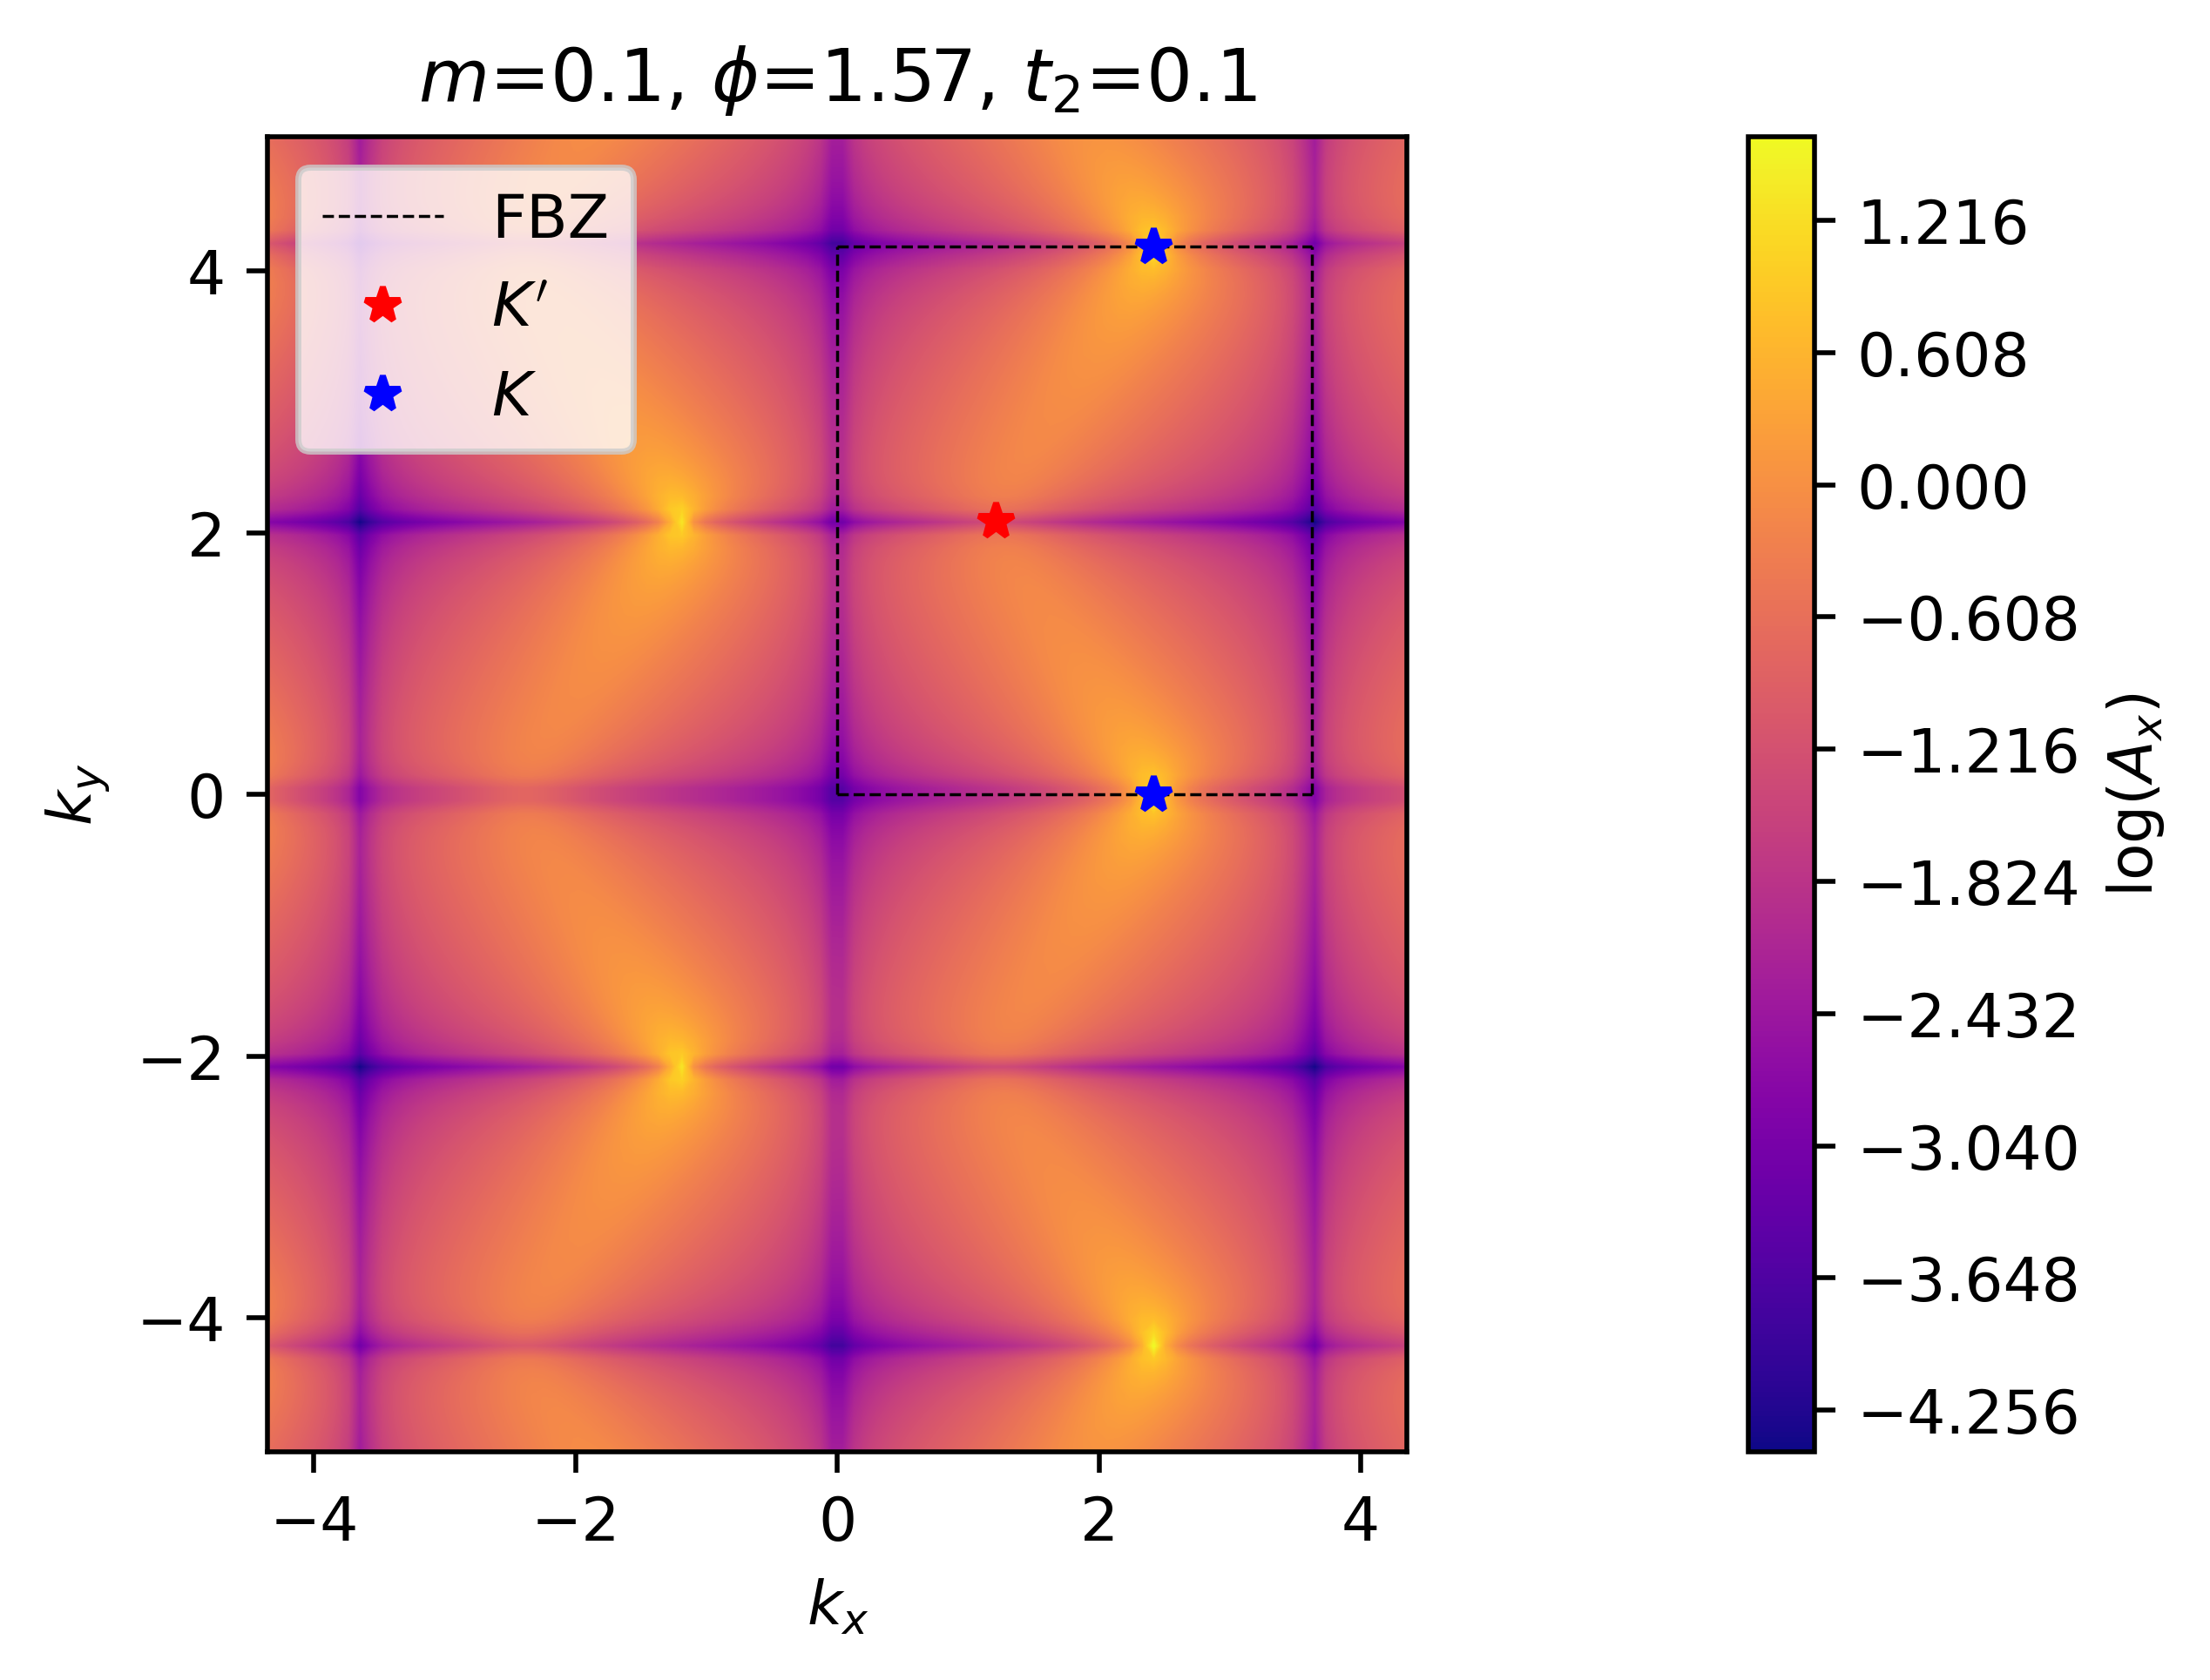

<Figure size 3000x2000 with 0 Axes>

In [13]:
berry_conn_plot("x",0.1,np.pi/2,0.1,[-1.2*kx_max,1.2*kx_max],[-1.2*ky_max,1.2*ky_max])

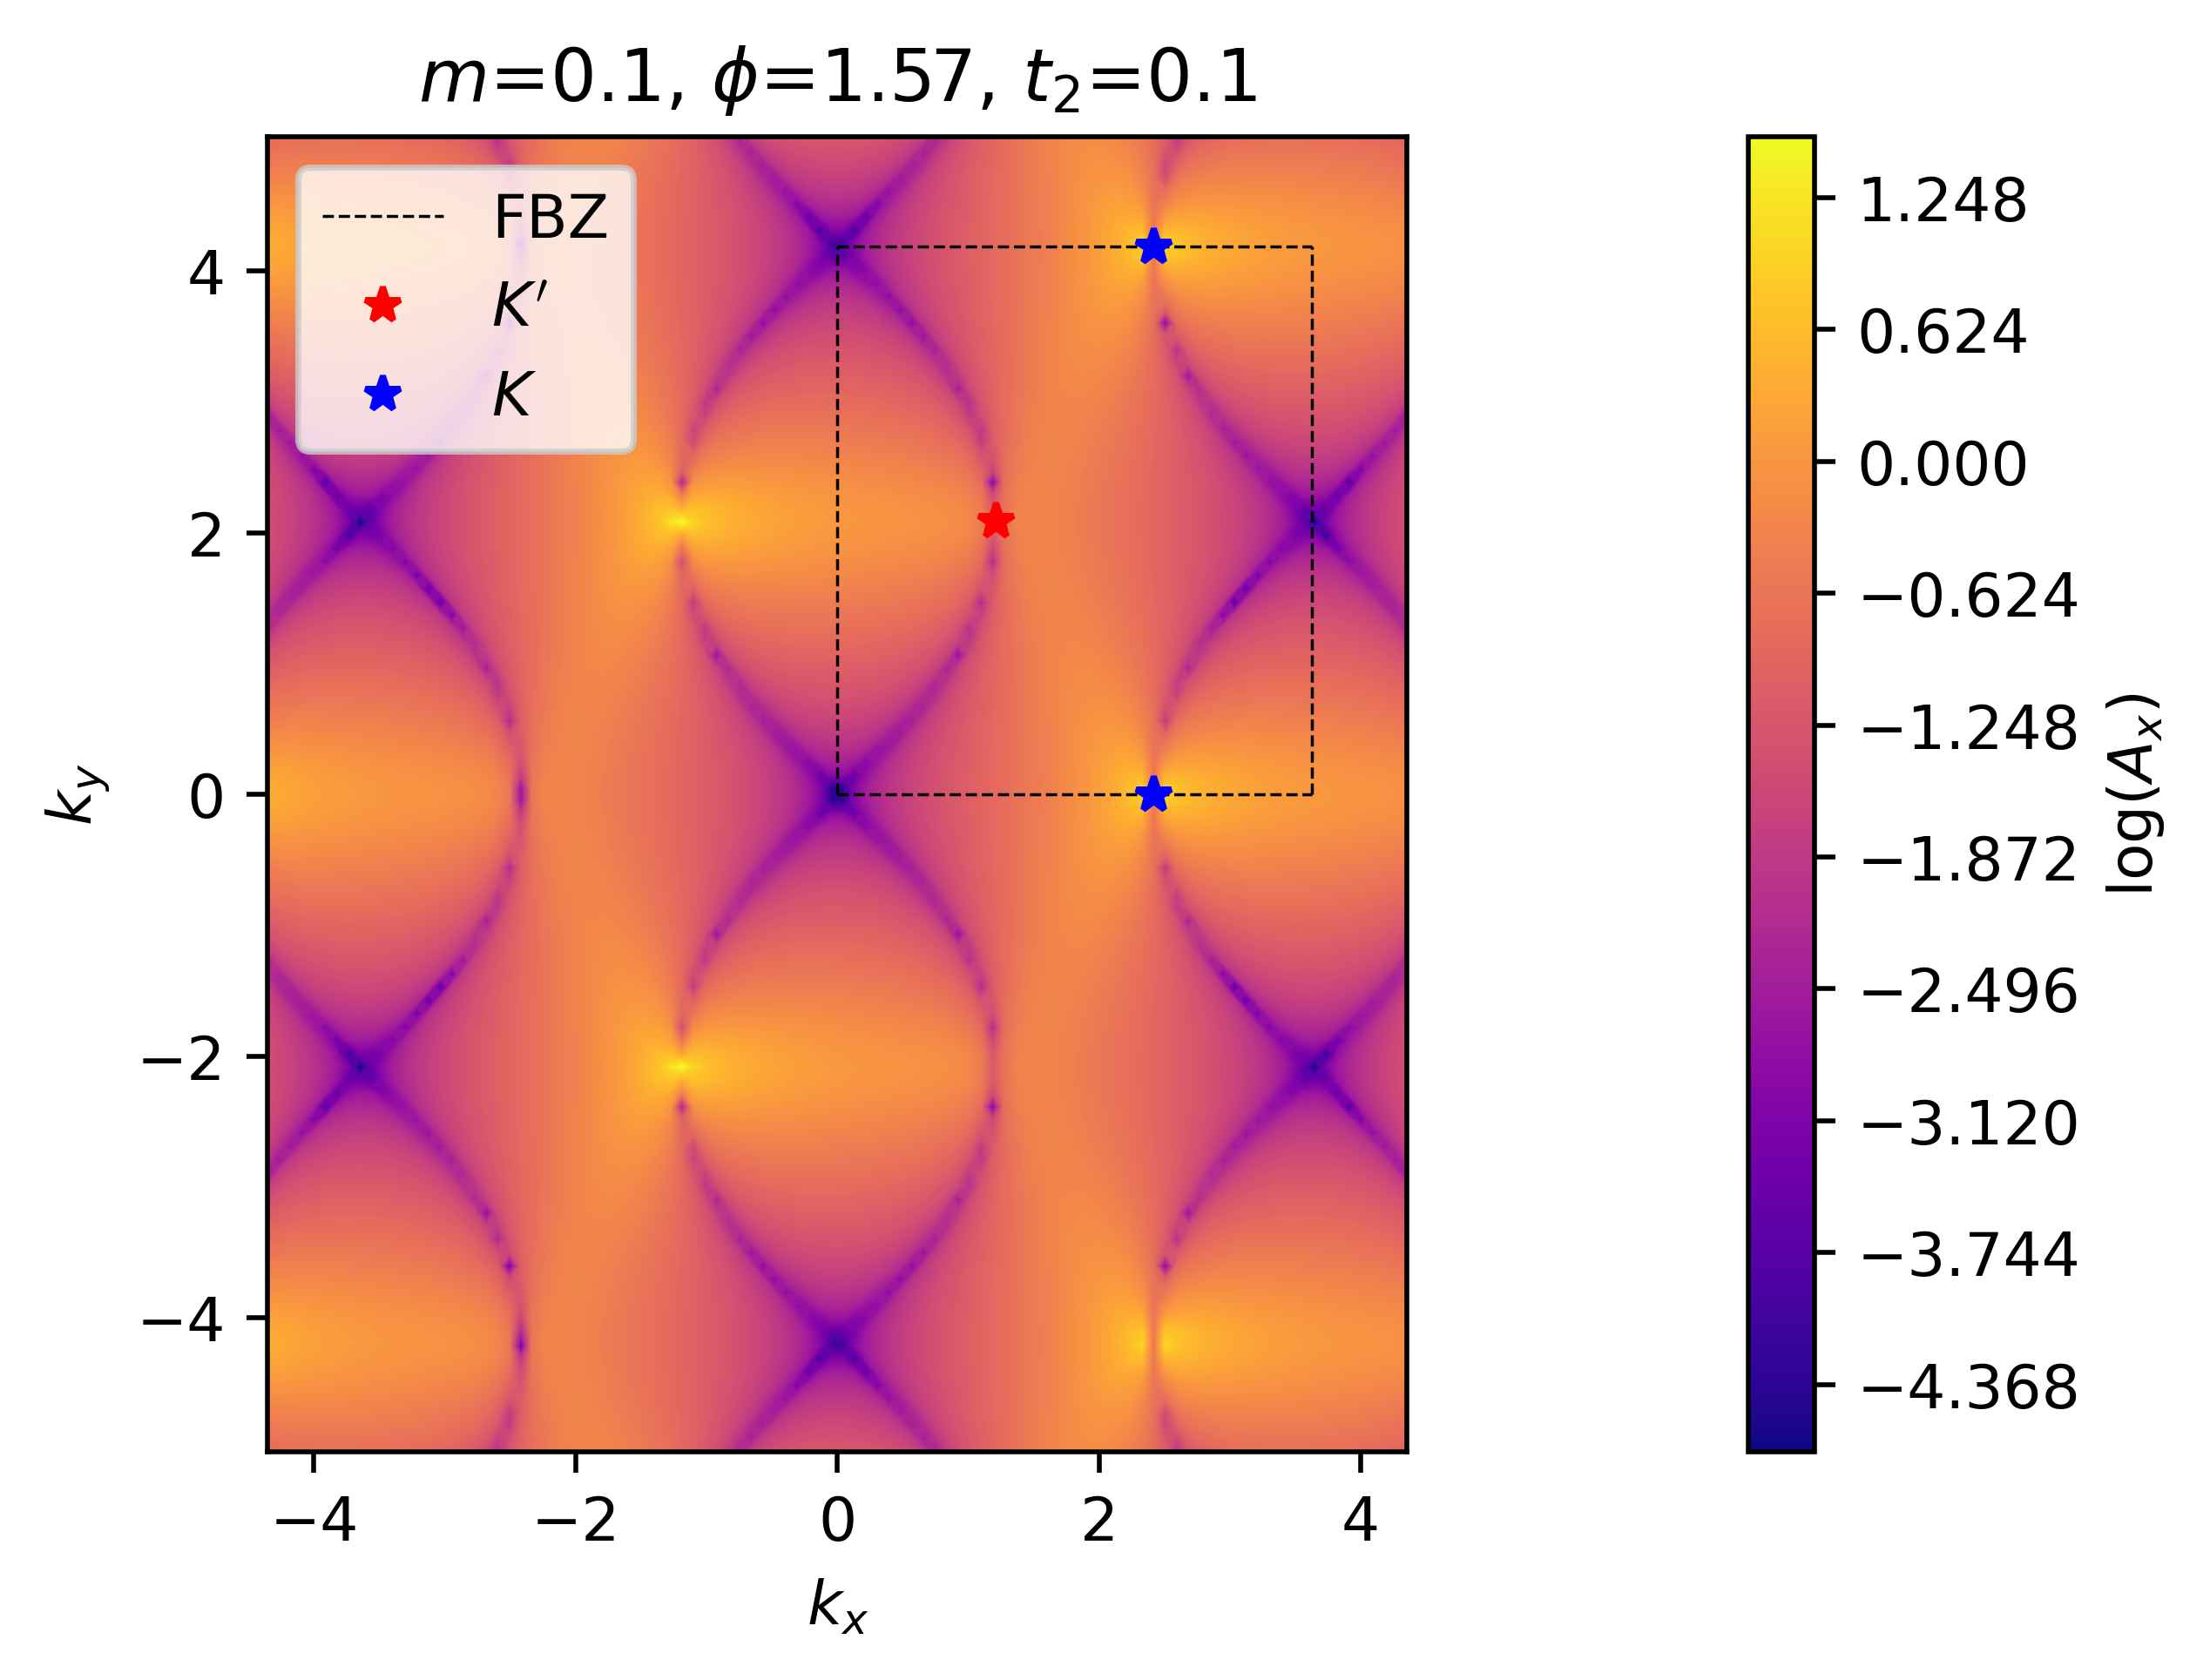

<Figure size 3000x2000 with 0 Axes>

In [14]:
berry_conn_plot("y",0.1,np.pi/2,0.1,[-1.2*kx_max,1.2*kx_max],[-1.2*ky_max,1.2*ky_max])

In [23]:
def berry_curv_plot(m,phi,t2,A,B):  
    t1=1
    
    Ed,Eu,Psid,Psiu=sy_Haldane_eigen(t1,t2,m,phi)
    
    Bxconn,Byconn=sy_Berry_conn(Psid)
    
    Bxconn=sy.lambdify([kx, ky], Bxconn, modules=['numpy'])
    Byconn=sy.lambdify([kx, ky], Byconn, modules=['numpy'])

    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)
    
    delta_mom=np.array([(max(xmom)-min(xmom))/100,(max(ymom)-min(ymom))/100])
    
    Berry_curv=[]
    Berry_connx=[]
    Berry_conny=[]
    
    chern=0
    
    for kx1 in xmom:
        for ky1 in ymom:
            mom=np.array([kx1,ky1])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Ax = Bxconn(kx1,ky1)
            Ay = Byconn(kx1,ky1)
            Berry_curv.extend([LField])
            Berry_connx.extend([np.abs(Ax)])
            Berry_conny.extend([np.abs(Ay)])
            chern+=LField/(2j*np.pi)
      
    Berry_curvature=np.transpose(np.reshape(Berry_curv,(len(xmom),len(ymom))))
    
    Berry_connectionx=np.transpose(np.reshape(Berry_connx,(len(xmom),len(ymom))))
    Berry_connectiony=np.transpose(np.reshape(Berry_conny,(len(xmom),len(ymom))))
    
    Berry_connectionx[Berry_connectionx>=3]=0
    Berry_connectiony[Berry_connectiony>=3]=0
    
    #plt.contourf(xmom, ymom, np.log10(Berry_connectionx), 1000, cmap='plasma')
    plt.contourf(xmom, ymom, np.imag(Berry_curvature)/(delta_mom[0]*delta_mom[1]), 1000, cmap='RdBu')
    plt.colorbar(label="$Im(\mathcal{F}_{xy})$")
    plt.quiver(xmom, ymom,(Berry_connectionx),(Berry_connectiony))
    plot_FBZ()
    plt.xlabel("$k_x$")
    plt.axis("scaled")
    plt.ylabel("$k_y$")
    plt.title("$m$="+str(round(m,2))+", $\phi$="+str(round(phi,2))+", $t_2$="+str(round(t2,2)))
    plt.legend()
    plt.show()
    plt.savefig("Berry_curvature.pdf")
    N=(A[1]-A[0])/kx_max*(B[1]-B[0])/ky_max
    print("The chern number is: "+str(np.real(chern)/N))

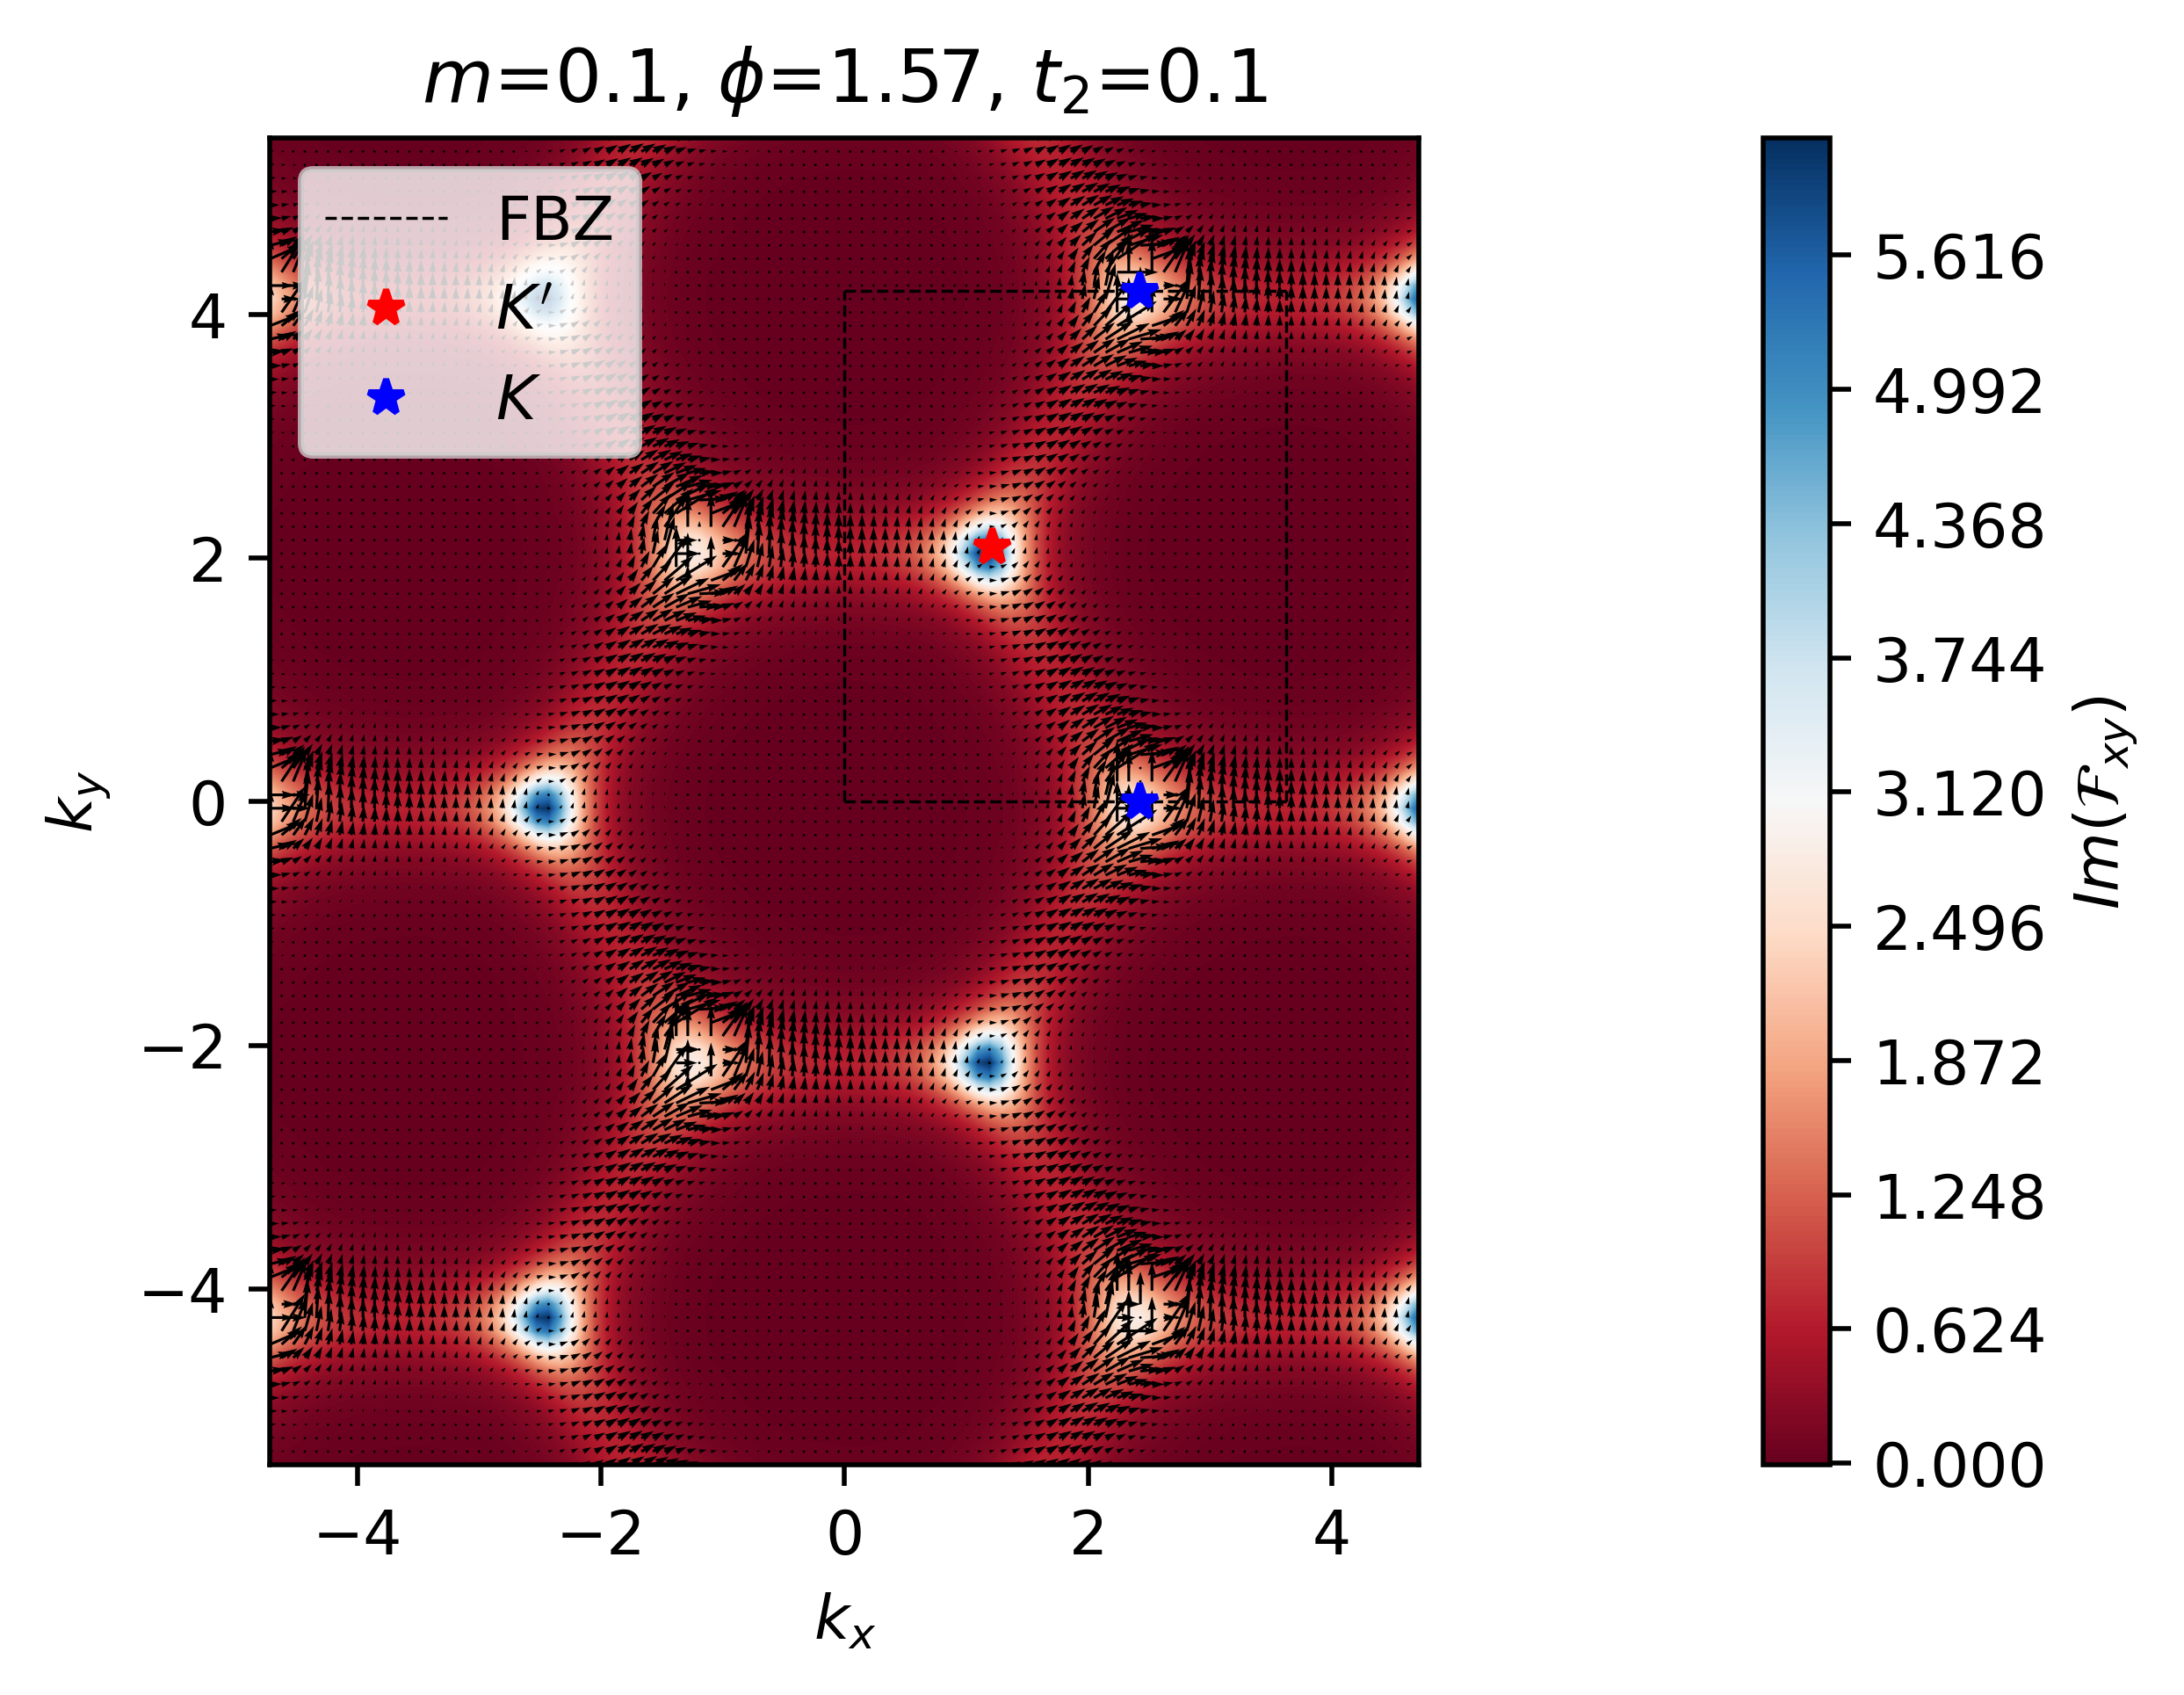

The chern number is: 0.9129333879314518


<Figure size 3000x2000 with 0 Axes>

In [24]:
berry_curv_plot(0.1,np.pi/2,0.1,[-1.3*kx_max,1.3*kx_max],[-1.3*ky_max,1.3*ky_max])

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def threedberry_curv_plot(m,phi,t2,A,B):  
    t1=1

    xmom=np.linspace(A[0],A[1],150)
    ymom=np.linspace(B[0],B[1],150)
    
    delta_mom=np.array([(max(xmom)-min(xmom))/150,(max(ymom)-min(ymom))/150])
    
    Berry_curv=[]
    chern=0
    
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
    
    Berry_curvature=np.transpose(np.reshape(Berry_curv,(len(xmom),len(ymom))))
    N=(A[1]-A[0])/kx_max*(B[1]-B[0])/ky_max
    fig = plt.figure()
    
    ax = fig.gca(projection='3d')

    kx, ky = np.meshgrid(xmom,ymom)

    surf = ax.plot_surface(kx, ky, np.imag(Berry_curvature)/(delta_mom[0]*delta_mom[1]),linewidth=0, cmap="RdBu")
    ax.set_xlabel("$k_x$")
    ax.set_ylabel("$k_y$")
    ax.set_zlabel("$Im(\mathcal{F}_{xy})$")
    
    plt.show()

    plt.savefig("3DBerry_curvature.pdf")
    
    print("The chern number is: "+str(np.real(chern)/N))

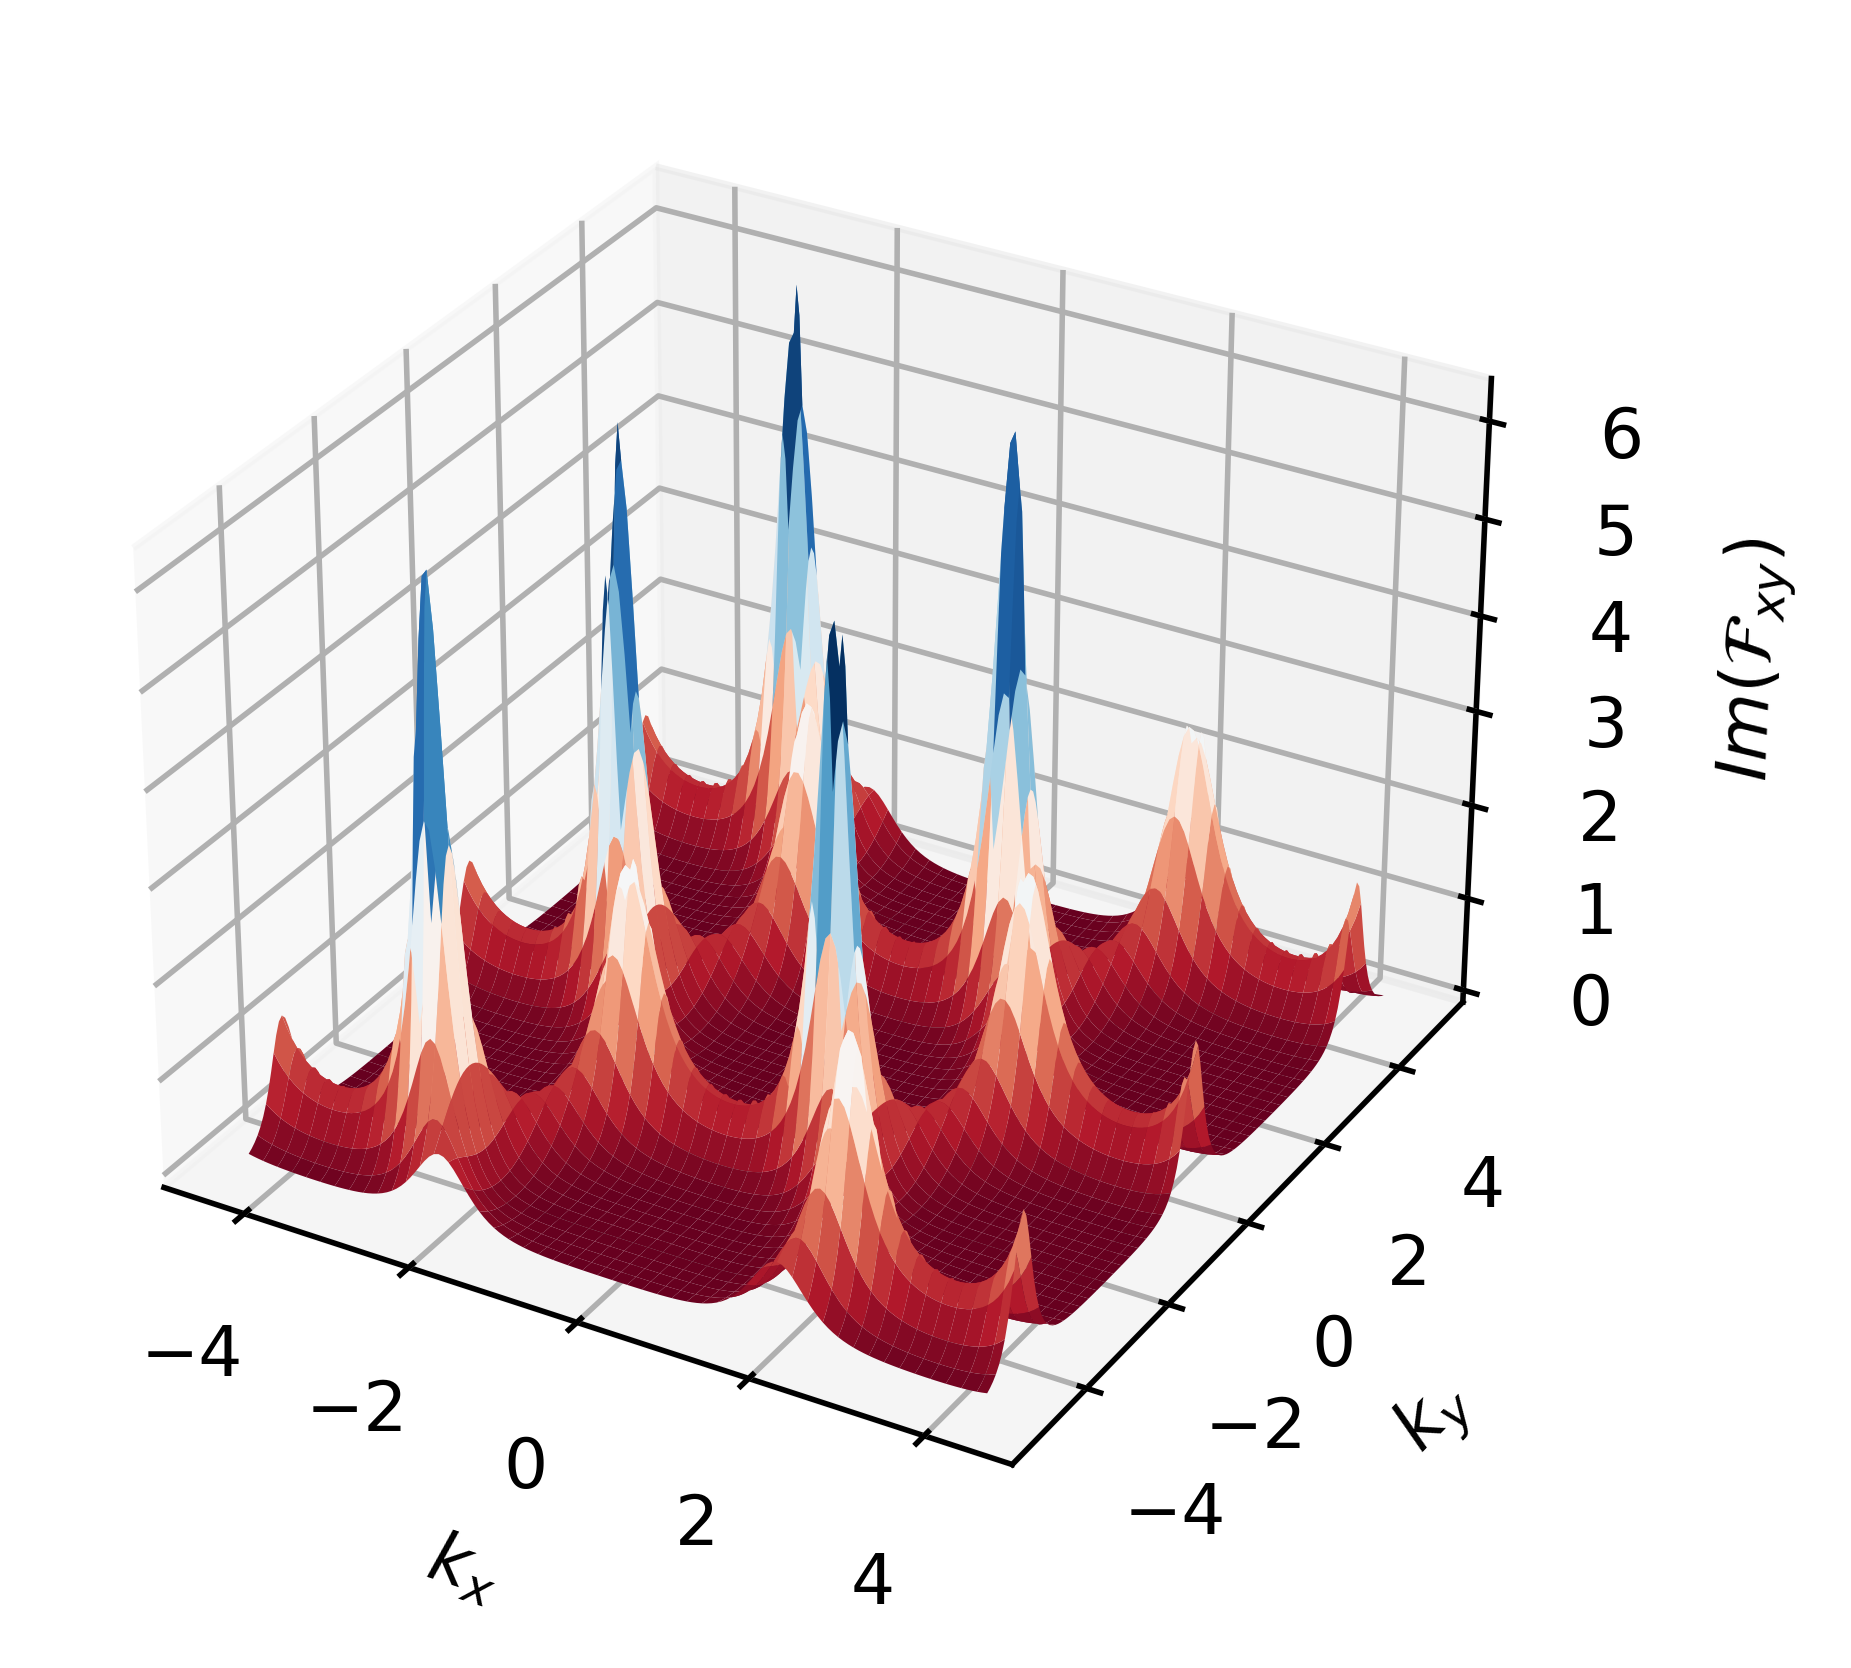

The chern number is: 0.9259771102343464


<Figure size 3000x2000 with 0 Axes>

In [26]:
threedberry_curv_plot(0.1,np.pi/2,0.1,[-1.2*kx_max,1.2*kx_max],[-1.2*ky_max,1.2*ky_max])

## Topological Phase diagram

In [ ]:
def chern(m,phi,t2,kxmax,kymax):  
    t1=1

    xmom=np.linspace(0,kxmax,50)
    ymom=np.linspace(0,kymax,50)
    
    delta_mom=np.array([kxmax/50,kymax/50])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
    return np.real(chern)

In [ ]:
Chern=[]

a=120

mrange=np.linspace(-1.5,1.5,a)
phirange=np.linspace(-np.pi,np.pi,a)

n=0

for phi in phirange:
    for m in mrange:
        n+=1
        c=chern(m,phi,0.2,kx_max,ky_max)
        Chern.extend([round(c)])
        print(m,phi,round(c),n/(a**2)*100)
        
Chern=np.transpose(np.reshape(Chern,(len(phirange),len(mrange))))

In [ ]:
from pylab import *
cmap = cm.get_cmap('coolwarm', 3)

plt.contourf(phirange,mrange, Chern, 20, cmap=cmap)
x=np.linspace(-np.pi,np.pi,100)
plt.plot(x,3*np.sqrt(3)*np.sin(x)*0.2,color="k",label="$m=\pm 3\sqrt{3}\sin \phi$",linewidth=2)
plt.plot(x,-3*np.sqrt(3)*np.sin(x)*0.2,color="k",linewidth=2)
plt.legend(loc=1)
plt.xlabel("$\phi$")
plt.ylabel("$m$")
plt.colorbar();
plt.ylim(-2,2)
plt.savefig("Haldane model phase diagram.pdf")

# Plot hexagonal FBZ and winding number

In [ ]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 150

xmom=np.arange(0,2*np.pi/(np.sqrt(3)),0.005)
ymom=np.arange(0,4*np.pi/3,0.005)

kx1,ky1=np.meshgrid(xmom,ymom)

a1 = np.array([np.sqrt(3) * 0.5, 0.5])
a2 = np.array([0, -1])
a3 = np.array([-np.sqrt(3) * 0.5, 0.5])

b1 = a2 - a3
b2 = a3 - a1
b3 = a1 - a2

t1=1
t2=0.2
phi=np.pi/2

m=0.5

dx = t1*((np.cos(a1[0]*kx1+a1[1]*ky1) + np.cos(a2[0]*kx1+a2[1]*ky1) + np.cos(a3[0]*kx1+a3[1]*ky1)))
dy = t1*(-np.sin(a1[0]*kx1+a1[1]*ky1) - np.sin(a2[0]*kx1+a2[1]*ky1) - np.sin(a3[0]*kx1+a3[1]*ky1))
dz = m + 2 * t2 * np.sin(phi) * (np.sin(b1[0]*kx1+b1[1]*ky1) + np.sin(b2[0]*kx1+b2[1]*ky1) + np.sin(b3[0]*kx1+b3[1]*ky1))

fig = plt.figure()

ax = fig.gca(projection='3d')
#ax.set_box_aspect((np.ptp(hx), np.ptp(hy), np.ptp(hz)))

surf = ax.plot_surface(dx, dy, dz,linewidth=0, alpha=0.2)

if np.max((dz))>0 and np.min((dz))<0:
    surf2 = ax.scatter([0], [0], [0],linewidth=0,alpha=1,color="r")
else:
    surf2 = ax.scatter([0], [0], [0],linewidth=0,alpha=1,color="k")

ax.set_zlim(-np.max(abs(dz)),np.max(abs(dz)))
#ax.view_init(0, 67)

plt.show()

In [ ]:
xmom=np.arange(-4*np.pi/(3*np.sqrt(3)),4*np.pi/(3*np.sqrt(3)),0.01)
ymom=np.arange(-2*np.pi/(3),2*np.pi/(3),0.01)

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
kx1=[]
ky1=[]

for i in xmom:
    for j in ymom:
        point = Point(i,j)
        polygon = Polygon([(4*np.pi/(3*np.sqrt(3)), 0), (2*np.pi/(3*np.sqrt(3)), 2*np.pi/3), 
                           (-2*np.pi/(3*np.sqrt(3)), 2*np.pi/3), (-4*np.pi/(3*np.sqrt(3)), 0),
                           (-2*np.pi/(3*np.sqrt(3)), -2*np.pi/3), (2*np.pi/(3*np.sqrt(3)), -2*np.pi/3)])
        if polygon.contains(point)==True:
            kx1.extend([i])
            ky1.extend([j])
        else:
            continue

In [ ]:
kx1=np.array(kx1)
ky1=np.array(ky1)

In [ ]:
%matplotlib inline
plt.plot(kx1,ky1,alpha=0.3,color="k")
plt.axes().set_aspect('equal')
plt.title("FBZ")
plt.xlabel("$k_x$")
plt.ylabel("$k_y$")
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

dx = t1*((np.cos(a1[0]*kx1+a1[1]*ky1) + np.cos(a2[0]*kx1+a2[1]*ky1) + np.cos(a3[0]*kx1+a3[1]*ky1)))
dy = t1*(-np.sin(a1[0]*kx1+a1[1]*ky1) - np.sin(a2[0]*kx1+a2[1]*ky1) - np.sin(a3[0]*kx1+a3[1]*ky1))
dz = m + 2 * t2 * np.sin(phi) * (np.sin(b1[0]*kx1+b1[1]*ky1) + np.sin(b2[0]*kx1+b2[1]*ky1) + np.sin(b3[0]*kx1+b3[1]*ky1))

fig = plt.figure()

ax = fig.gca(projection='3d')
#ax.set_box_aspect((np.ptp(hx), np.ptp(hy), np.ptp(hz)))

surf = ax.scatter(dx, dy, dz,linewidth=0, s=0.1, alpha=0.2)

if np.max((dz))>0 and np.min((dz))<0:
    surf2 = ax.scatter([0], [0], [0],linewidth=0,alpha=1,color="r")
else:
    surf2 = ax.scatter([0], [0], [0],linewidth=0,alpha=1,color="k")

ax.set_zlim(-np.max(abs(dz)),np.max(abs(dz)))
#ax.view_init(0, 67)

plt.show()